In [52]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [53]:
word_count_mean_avg_prec = [0.009, 0.017, 0.023, 0.029, 0.035, 0.04, 0.044, 0.05, 0.054, 0.058]
tfidf_mean_avg_prec = [0.016, 0.029, 0.042, 0.053, 0.063, 0.072, 0.081, 0.089, 0.097, 0.105]
lsi_mean_avg_prec = [0.014, 0.029, 0.042, 0.056, 0.068, 0.08, 0.091, 0.102, 0.114, 0.124]
rocchio_mean_avg_prec = [0.017, 0.034, 0.051, 0.066, 0.081, 0.096, 0.11, 0.124, 0.138, 0.151]

##### Observe change in mAP@N for each N
The results here are an ever increasing mAP@N, which is expected given the amount of documents considered relevant for each query. As more documents are included, the precision is going to be higher, as it increases the likelihood that one of the returned documents is in the entire list of relevant documents

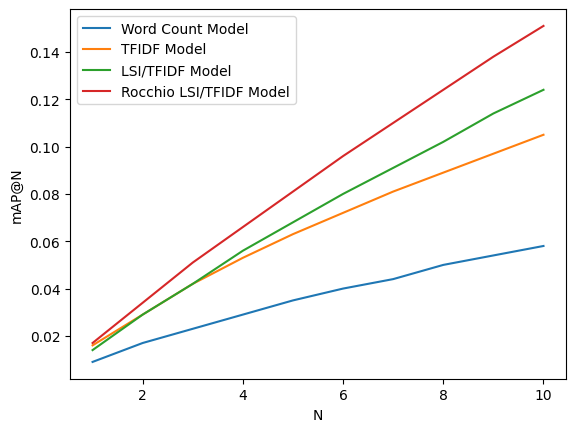

In [58]:
x = np.linspace(1, 10, 10)
plt.plot(x, word_count_mean_avg_prec, label='Word Count Model')
plt.plot(x, tfidf_mean_avg_prec, label='TFIDF Model')
plt.plot(x, lsi_mean_avg_prec, label='LSI/TFIDF Model')
plt.plot(x, rocchio_mean_avg_prec, label='Rocchio LSI/TFIDF Model')
plt.legend(loc="upper left")
plt.xlabel('N')
plt.ylabel('mAP@N')
plt.show()

In [59]:
# IMPORT dicts
with open(r'assets/rocchio-pre.json') as f:
    pre_at_n = json.load(f)
    
with open(r'assets/rocchio-re.json') as f:
    re_at_n = json.load(f)

#### Total Precision and Recall scores after the Rocchio model
These histograms show the distribution of the Precision and Recall scores across queries. You can see that precision is either very high, or very low/0. This makes intuitive sense, because as I stated earlier, due to the large amount of documents considered relevant for each query, precision @ 10 is very likely to include many documents that are relevant to the user, in no particular order. A precision of 0 suggests that there are a lot of queries in the data that the Recommender system does not have high precision for. This is likely because there is a lot of overlap between queries, and also do to the method I used to determine relevant documents. Many NAICS codes descriptions share similar industry descriptions, and a lot of words are similar across industries. Many of the words in queries might not even appear in the data set. For example, or intuition tells us that "violin shop" falls under 451140 - Musical Instrument and Supplies Stores, but if you look through the data, the word violin never appears in the description. A human can easily tell that a violin shop is a musical instrument store, but without seeing it in text, the Recommender system cannot do the same. Improving results would require further engineering, as well as a professional review of relevant documents, with many users providing feedback.

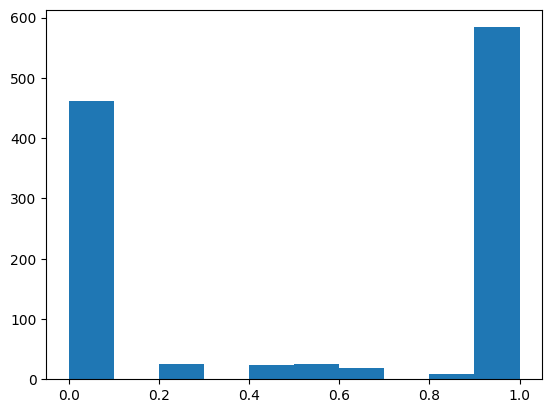

In [62]:
plt.hist(pre_at_n.values())
plt.xlabel('Precision Score')
plt.show()

As expected, Recall is consistently very low due to the number of documents that that are considered relevant for each query. Again, refining the list of relevant documents for each query is the only way to really improve recall while maintaining high precision scores.

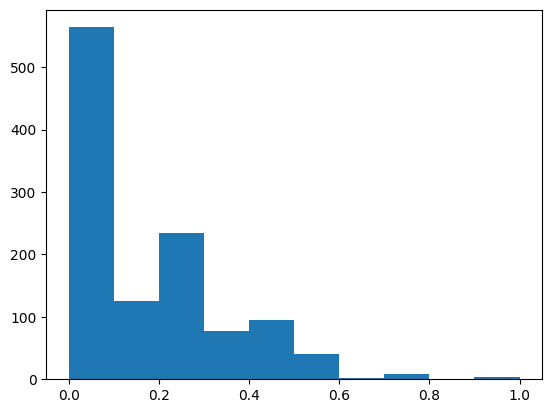

In [63]:
plt.hist(re_at_n.values())
plt.show()